# Pattern Recognition Assignments 2: Classification

Se preparan todas las librerías necesarias para ejecutar el programa

In [28]:
# Se importa la librería numpy
import numpy as np

# Librería para los Plots
import matplotlib.pyplot as plt

# Imports de la libreria scipy
from scipy.spatial.distance import cdist

# K-Nearest Neighbors

- **Q1**) Primero se tiene que implementar una función que haga la clasificación kNN para clasificar el dataset Iris.

In [2]:
# Se crean unas variables para guardar los datos de Iris y sus labels
# Como el fichero tiene una línea al final, se pone el if x.strip(), ya que si esta vació, esta línea no la coge.
data_Iris = np.array([map(float,x.split(',')[:-1]) for x in open('iris.data') if x.strip()])
labels_Iris = np.array([x.split(',')[-1].strip() for x in open('iris.data') if x.strip()])

# Se cargan las matrices para los indices de los grupos de test y los grupos de entrenamiento
train_ = np.loadtxt('iris_idx_train.txt')
test_ = np.loadtxt('iris_idx_test.txt')

# Como son indices, se pasan a integers
train_Index = train_.astype(int)
test_Index = test_.astype(int)

# Se crean las dos matrices a partir de los indices de entrenamiento
train_dataIris = data_Iris[train_Index,:]
train_labelsIris = labels_Iris[train_Index]

# Se crean las dos matrices a partir de los indeces de test
test_dataIris = data_Iris[test_Index,:]
test_labelsIris = labels_Iris[test_Index]


Una vez se tienen los datos, ya se puede pasar a realizar el algoritmo ***kNN*** que se implementará para un k desde 1 a 9:

In [36]:
# Definición de una función para calcular la exactitud de la detección
def getAccuracy(calc_labels, results):
    correct = 0
    for i in range(len(results)):
        if calc_labels[i][-1] == results[i]:
            correct += 1
    return (correct/float(len(results))) * 100.0
  
acc_plot = []
index = []
# Definición del algoritmo kNN:
def kNN_function(train_data, train_labels, test_data, test_labels):
    for k in range(1,10):
        # Primero se debe asignar la distancia entre los puntos de los dos test de datos
        distance = cdist(train_data,test_data)
        # Ahora se tiene que encontrar los valores más cercanos
        minimum_dist = np.argsort(distance.T,1)[:,1:k+1]
        # Con las etiquetas ordenadas, ahora se debe actualizar las etiquetas
        minimum_labels = train_labels[minimum_dist]
        #print minimum_labels
        #print test_labels
        #Por ultimo se debe adquirir la accuraccy
        Acc_Value = getAccuracy(minimum_labels,test_labels)
        #Acc_Value = getAccuracy(train_data,minimum_labels)
        print 'Accuracy for k = ', k, ':   ',Acc_Value,'%.'
        #acc = accuracy_score(test_labels, [Counter(x).most_common()[0][0] for x in minimum_labels] )
        #print 'Accuracy ',k,':', acc
        # Save the accuracy of the odd numbers
        if(k%2 != 0):
            acc_plot.append(Acc_Value)
            index.append(k)
        
        
# We call the function with the train and test splits

kNN_function(train_dataIris, train_labelsIris, test_dataIris, test_labelsIris)

Accuracy for k =  1 :    94.0 %.
Accuracy for k =  2 :    92.0 %.
Accuracy for k =  3 :    98.0 %.
Accuracy for k =  4 :    94.0 %.
Accuracy for k =  5 :    92.0 %.
Accuracy for k =  6 :    90.0 %.
Accuracy for k =  7 :    88.0 %.
Accuracy for k =  8 :    82.0 %.
Accuracy for k =  9 :    84.0 %.


La precisión no es tan buena como con las funciones kNN del módulo *sklearn.neighbors*, pero es bastante buena. El siguiente paso es hacer lo mismo con los valores de *3DClothing dataset*:

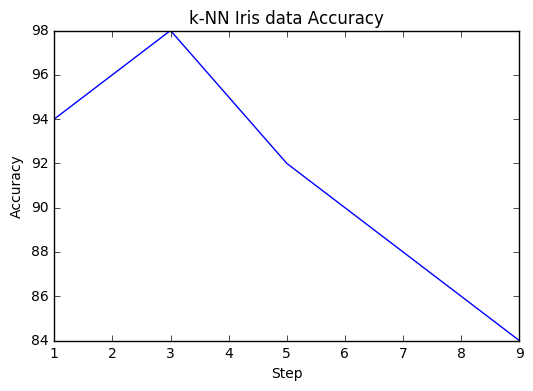

In [41]:
# Plot the accuracy of Iris kNN classifier
# Define the descriptors
plt.title("k-NN Iris data Accuracy")
plt.xlabel("Step")
plt.ylabel("Accuracy")

#Plot the Accuracy
plt.plot(index, acc_plot)
plt.show()

Se repite todo para los datos de 3D clothing

Accuracy for k =  1 :    56.5217391304 %.
Accuracy for k =  2 :    57.9710144928 %.
Accuracy for k =  3 :    55.5555555556 %.
Accuracy for k =  4 :    56.5217391304 %.
Accuracy for k =  5 :    57.0048309179 %.
Accuracy for k =  6 :    55.0724637681 %.
Accuracy for k =  7 :    50.2415458937 %.
Accuracy for k =  8 :    46.8599033816 %.
Accuracy for k =  9 :    43.961352657 %.


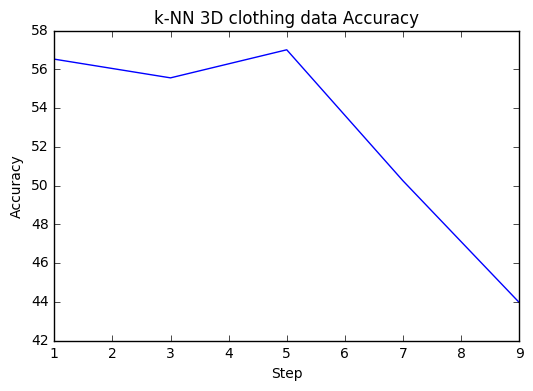

In [44]:
# Se repite el código con clothing dataset

# Se cargan las labels de los datos 3D clothing
labels_3D_test = np.array([x.strip() for x in open('3dclothing_labels_test.txt') if x.strip()])
labels_3D_train = np.array([x.strip() for x in open('3dclothing_labels_train.txt') if x.strip()])

# Ahora se cargan los datos de test y train
train_3D = np.load('3dclothing_train.npy')
test_3D = np.load('3dclothing_test.npy')

# Reset the plot variables
acc_plot = []
index = []

kNN_function(train_3D, labels_3D_train, test_3D, labels_3D_test)

# Plot the accuraccy
# Plot the accuracy of Iris kNN classifier
# Define the descriptors
plt.title("k-NN 3D clothing data Accuracy")
plt.xlabel("Step")
plt.ylabel("Accuracy")

#Plot the Accuracy
plt.plot(index, acc_plot)
plt.show()